# WEST BENGAL

In [680]:
import pandas as pd

# Load the datasets for West Bengal
df_wb_enrolment = pd.read_csv('/content/West Bengal Enrolment Dataset.csv')
df_wb_demographic = pd.read_csv('/content/West Bengal Demographic Dataset.csv')
df_wb_biometric_1 = pd.read_csv('/content/West Bengal Biometric Dataset(1).csv')
df_wb_biometric_2 = pd.read_csv('/content/West Bengal Biometric Dataset(2).csv')

# Concatenate the two biometric datasets
df_wb_biometric = pd.concat([df_wb_biometric_1, df_wb_biometric_2], ignore_index=True)

print("West Bengal Enrolment Dataset:")
print(df_wb_enrolment.head())
print(df_wb_enrolment.info())
print(df_wb_enrolment.describe())

print("\nWest Bengal Demographic Dataset:")
print(df_wb_demographic.head())
print(df_wb_demographic.info())
print(df_wb_demographic.describe())

print("\nWest Bengal Biometric Dataset:")
print(df_wb_biometric.head())
print(df_wb_biometric.info())
print(df_wb_biometric.describe())

West Bengal Enrolment Dataset:
         date        state           district  pincode  age_0_5  age_5_17  \
0  01-04-2025  West Bengal         Darjeeling   734010       81        49   
1  01-04-2025  West Bengal        Cooch Behar   736135      243       127   
2  01-04-2025  West Bengal  North 24 Parganas   700159       35        28   
3  01-04-2025  West Bengal     Uttar Dinajpur   733134      484       109   
4  01-05-2025  West Bengal            Kolkata   700014       90        78   

   age_18_greater  
0              17  
1              20  
2              14  
3              27  
4              10  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90221 entries, 0 to 90220
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            90221 non-null  object
 1   state           90221 non-null  object
 2   district        90221 non-null  object
 3   pincode         90221 non-null  int64 
 4   age_0_5  

In [681]:
df_wb_enrolment['date'] = pd.to_datetime(df_wb_enrolment['date'], format='%d-%m-%Y')
df_wb_demographic['date'] = pd.to_datetime(df_wb_demographic['date'], format='%d-%m-%Y')
df_wb_biometric['date'] = pd.to_datetime(df_wb_biometric['date'], format='%d-%m-%Y')

print("Data types after date conversion for df_wb_enrolment:")
print(df_wb_enrolment.info())
print("\nData types after date conversion for df_wb_demographic:")
print(df_wb_demographic.info())
print("\nData types after date conversion for df_wb_biometric:")
print(df_wb_biometric.info())

Data types after date conversion for df_wb_enrolment:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90221 entries, 0 to 90220
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            90221 non-null  datetime64[ns]
 1   state           90221 non-null  object        
 2   district        90221 non-null  object        
 3   pincode         90221 non-null  int64         
 4   age_0_5         90221 non-null  int64         
 5   age_5_17        90221 non-null  int64         
 6   age_18_greater  90221 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 4.8+ MB
None

Data types after date conversion for df_wb_demographic:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190385 entries, 0 to 190384
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   date           19038

In [682]:
df_wb_biometric['state'] = df_wb_biometric['state'].str.title()

print("West Bengal Biometric Dataset after 'state' column standardization:")
print(df_wb_biometric.head())
merged_df_temp = pd.merge(df_wb_enrolment, df_wb_demographic, on=['date', 'state', 'district', 'pincode'], how='outer')
df_merged = pd.merge(merged_df_temp, df_wb_biometric, on=['date', 'state', 'district', 'pincode'], how='outer')

# Identify numeric columns
numeric_cols = df_merged.select_dtypes(include=['number']).columns

# Replace NaN values in numeric columns with 0
df_merged[numeric_cols] = df_merged[numeric_cols].fillna(0)

print("Merged DataFrame (df_merged) head:")
print(df_merged.head())
print("\nMerged DataFrame (df_merged) info:")
print(df_merged.info())

West Bengal Biometric Dataset after 'state' column standardization:
        date        state district  pincode  bio_age_5_17  bio_age_17_
0 2026-01-03  West Bengal   HOWRAH   711312             1            0
1 2025-12-28  West Bengal   HOWRAH   711312             1            0
2 2025-11-07  West Bengal   HOWRAH   711303             0            1
3 2025-11-20  West Bengal   HOWRAH   711312             0            1
4 2025-11-01  West Bengal  HOOGHLY   712232             0            1
Merged DataFrame (df_merged) head:
        date        state    district  pincode  age_0_5  age_5_17  \
0 2025-03-01  West Bengal  Alipurduar   735204      0.0       0.0   
1 2025-03-01  West Bengal  Alipurduar   735204      0.0       0.0   
2 2025-03-01  West Bengal  Alipurduar   735211      0.0       0.0   
3 2025-03-01  West Bengal  Alipurduar   735211      0.0       0.0   
4 2025-03-01  West Bengal  Alipurduar   735220      0.0       0.0   

   age_18_greater  demo_age_5_17  demo_age_17_  bio_age_

In [683]:
print("Shape of df_merged:", df_merged.shape)
print("\nInfo of df_merged:")
df_merged.info()
print("\nDescription of df_merged:")
print(df_merged.describe())
df_wb = df_merged[df_merged['state'] == 'West Bengal'].copy()
df_wb['year'] = df_wb['date'].dt.year
df_wb['month'] = df_wb['date'].dt.month

print("Shape of df_ap:", df_wb.shape)
print("\nFirst 5 rows of df_wb with new 'year' and 'month' columns:")
print(df_wb.head())

Shape of df_merged: (225831, 11)

Info of df_merged:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225831 entries, 0 to 225830
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   date            225831 non-null  datetime64[ns]
 1   state           225831 non-null  object        
 2   district        225831 non-null  object        
 3   pincode         225831 non-null  int64         
 4   age_0_5         225831 non-null  float64       
 5   age_5_17        225831 non-null  float64       
 6   age_18_greater  225831 non-null  float64       
 7   demo_age_5_17   225831 non-null  float64       
 8   demo_age_17_    225831 non-null  float64       
 9   bio_age_5_17    225831 non-null  float64       
 10  bio_age_17_     225831 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(2)
memory usage: 19.0+ MB

Description of df_merged:
                                date  

In [684]:
age_columns = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

df_wb_agg = df_wb.groupby(['year', 'month', 'state', 'district'])[age_columns].sum().reset_index()

print("Aggregated DataFrame (df_ap_agg) head:")
print(df_wb_agg.head())
print("\nAggregated DataFrame (df_ap_agg) info:")
print(df_wb_agg.info())

Aggregated DataFrame (df_ap_agg) head:
   year  month        state     district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  West Bengal   Alipurduar      0.0       0.0             0.0   
1  2025      3  West Bengal      Bankura      0.0       0.0             0.0   
2  2025      3  West Bengal   Barddhaman      0.0       0.0             0.0   
3  2025      3  West Bengal      Birbhum      0.0       0.0             0.0   
4  2025      3  West Bengal  Cooch Behar      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  
0          302.0        3156.0           0.0          0.0  
1         1601.0       20474.0           0.0          0.0  
2          985.0       18712.0           0.0          0.0  
3         2035.0       26133.0           0.0          0.0  
4         1440.0       18502.0           0.0          0.0  

Aggregated DataFrame (df_ap_agg) info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (

In [685]:
import numpy as np

# 1. Create 'totalenrolments' column
df_wb_agg['totalenrolments'] = df_wb_agg['age_0_5'] + df_wb_agg['age_5_17'] + df_wb_agg['age_18_greater']

# 2. Create 'childenrolments' column
df_wb_agg['childenrolments'] = df_wb_agg['age_0_5'] + df_wb_agg['age_5_17']

# 3. Create 'totaldemoupdates' column
df_wb_agg['totaldemoupdates'] = df_wb_agg['demo_age_5_17'] + df_wb_agg['demo_age_17_']

# 4. Create 'totalbioupdates' column
df_wb_agg['totalbioupdates'] = df_wb_agg['bio_age_5_17'] + df_wb_agg['bio_age_17_']

# 5. Calculate 'CES' (Child Enrolment Score) with division by zero handling
df_wb_agg['CES'] = np.where(
    df_wb_agg['totalenrolments'] == 0,
    0,
    df_wb_agg['childenrolments'] / df_wb_agg['totalenrolments']
)

# 6. Calculate 'DUR' (Demographic Update Rate) with division by zero handling
df_wb_agg['DUR'] = np.where(
    df_wb_agg['totalenrolments'] == 0,
    0,
    df_wb_agg['totaldemoupdates'] / df_wb_agg['totalenrolments']
)

# 7. Calculate 'BUR' (Biometric Update Rate) with division by zero handling
df_wb_agg['BUR'] = np.where(
    df_wb_agg['totalenrolments'] == 0,
    0,
    df_wb_agg['totalbioupdates'] / df_wb_agg['totalenrolments']
)

# 8. Display the head of the DataFrame
print("Aggregated DataFrame (df_wb_agg) with new metrics head:")
print(df_wb_agg.head())

Aggregated DataFrame (df_wb_agg) with new metrics head:
   year  month        state     district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  West Bengal   Alipurduar      0.0       0.0             0.0   
1  2025      3  West Bengal      Bankura      0.0       0.0             0.0   
2  2025      3  West Bengal   Barddhaman      0.0       0.0             0.0   
3  2025      3  West Bengal      Birbhum      0.0       0.0             0.0   
4  2025      3  West Bengal  Cooch Behar      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  totalenrolments  \
0          302.0        3156.0           0.0          0.0              0.0   
1         1601.0       20474.0           0.0          0.0              0.0   
2          985.0       18712.0           0.0          0.0              0.0   
3         2035.0       26133.0           0.0          0.0              0.0   
4         1440.0       18502.0           0.0          0.0              0.0   



In [686]:
def min_max_normalize(series):
    min_val = series.min()
    max_val = series.max()
    if max_val == min_val:
        return 0  # Handle division by zero case
    return (series - min_val) / (max_val - min_val)

# Apply min-max normalization to 'totalenrolments', grouped by 'year' and 'state'
df_wb_agg['Enorm'] = df_wb_agg.groupby(['year', 'state'])['totalenrolments'].transform(min_max_normalize)

# Apply min-max normalization to 'totaldemoupdates', grouped by 'year' and 'state'
df_wb_agg['Dnorm'] = df_wb_agg.groupby(['year', 'state'])['totaldemoupdates'].transform(min_max_normalize)

# Apply min-max normalization to 'totalbioupdates', grouped by 'year' and 'state'
df_wb_agg['Bnorm'] = df_wb_agg.groupby(['year', 'state'])['totalbioupdates'].transform(min_max_normalize)

# Calculate 'stdnorm' by combining the normalized metrics
df_wb_agg['stdnorm'] = (df_wb_agg['Enorm'] + df_wb_agg['Dnorm'] + df_wb_agg['Bnorm']) / 3

# Compute 'ALBI' (Aadhaar Lifecycle Balance Index) as 1 - stdnorm
df_wb_agg['ALBI'] = 1 - df_wb_agg['stdnorm']

# Clip the values in the 'ALBI' column to ensure they are between 0 and 1
df_wb_agg['ALBI'] = df_wb_agg['ALBI'].clip(lower=0, upper=1)

# Display the head of the DataFrame to show the newly created columns
print("Aggregated DataFrame (df_wb_agg) with normalized metrics and ALBI head:")
print(df_wb_agg.head())

Aggregated DataFrame (df_wb_agg) with normalized metrics and ALBI head:
   year  month        state     district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  West Bengal   Alipurduar      0.0       0.0             0.0   
1  2025      3  West Bengal      Bankura      0.0       0.0             0.0   
2  2025      3  West Bengal   Barddhaman      0.0       0.0             0.0   
3  2025      3  West Bengal      Birbhum      0.0       0.0             0.0   
4  2025      3  West Bengal  Cooch Behar      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  ...  totaldemoupdates  \
0          302.0        3156.0           0.0  ...            3458.0   
1         1601.0       20474.0           0.0  ...           22075.0   
2          985.0       18712.0           0.0  ...           19697.0   
3         2035.0       26133.0           0.0  ...           28168.0   
4         1440.0       18502.0           0.0  ...           19942.0   

   totalbioupdates  CES  D

In [687]:
df_wb_agg['Enormrisk'] = 1 - df_wb_agg['Enorm']
df_wb_agg['CESrisknorm'] = 1 - df_wb_agg['CES']
df_wb_agg['DURrisknorm'] = 1 - df_wb_agg['DUR']
df_wb_agg['BURrisknorm'] = 1 - df_wb_agg['BUR']
df_wb_agg['ALBIrisknorm'] = 1 - df_wb_agg['ALBI']

# Calculate the 'riskscore' by summing the risk components, averaging, and scaling to 0-100
df_wb_agg['riskscore'] = (
    df_wb_agg['Enormrisk'] +
    df_wb_agg['CESrisknorm'] +
    df_wb_agg['DURrisknorm'] +
    df_wb_agg['BURrisknorm'] +
    df_wb_agg['ALBIrisknorm']
) / 5 * 100

# Display the head of the DataFrame to show the newly created risk-related columns
print("Aggregated DataFrame (df_wb_agg) with risk components and riskscore head:")
print(df_wb_agg.head())

Aggregated DataFrame (df_wb_agg) with risk components and riskscore head:
   year  month        state     district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  West Bengal   Alipurduar      0.0       0.0             0.0   
1  2025      3  West Bengal      Bankura      0.0       0.0             0.0   
2  2025      3  West Bengal   Barddhaman      0.0       0.0             0.0   
3  2025      3  West Bengal      Birbhum      0.0       0.0             0.0   
4  2025      3  West Bengal  Cooch Behar      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  ...     Dnorm  Bnorm   stdnorm  \
0          302.0        3156.0           0.0  ...  0.037930    0.0  0.012643   
1         1601.0       20474.0           0.0  ...  0.242135    0.0  0.080712   
2          985.0       18712.0           0.0  ...  0.216052    0.0  0.072017   
3         2035.0       26133.0           0.0  ...  0.308968    0.0  0.102989   
4         1440.0       18502.0           0.0  ...  

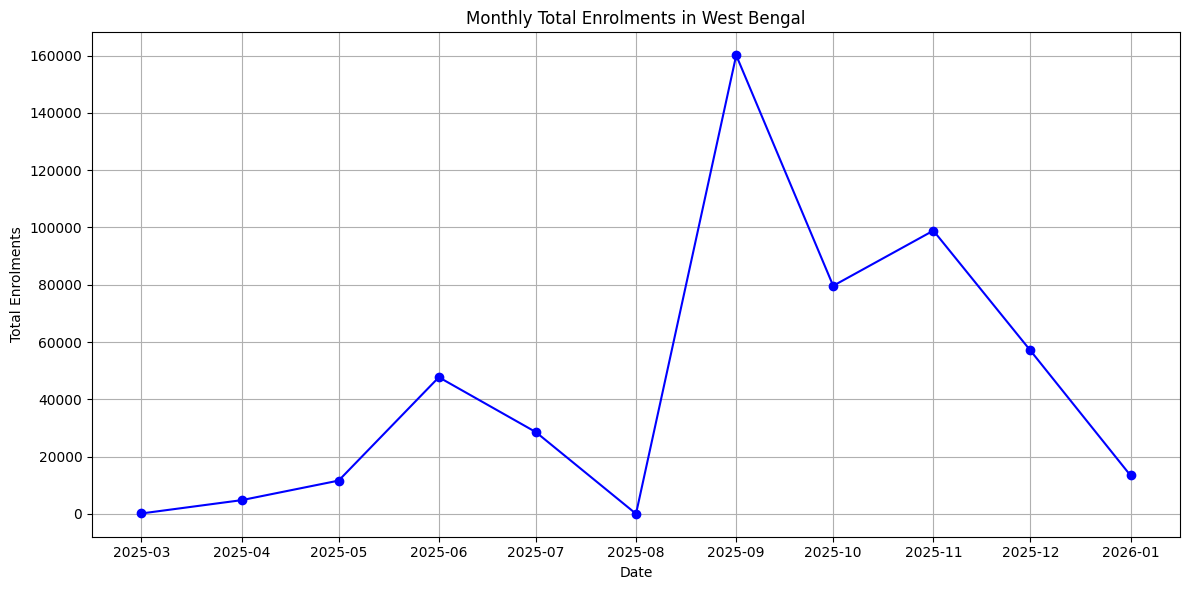

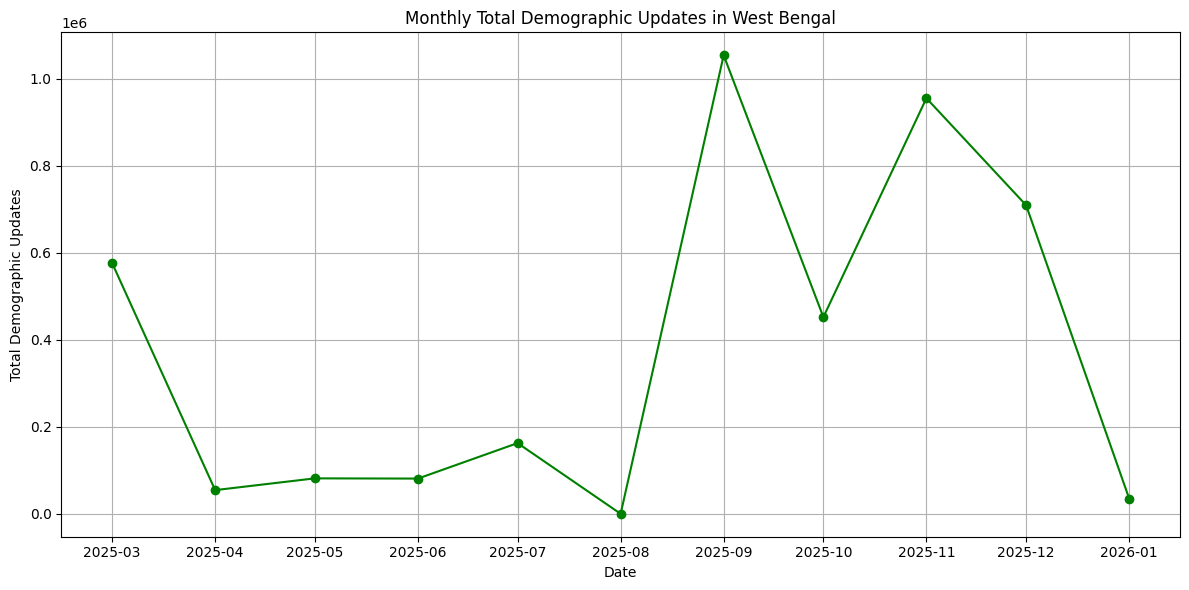

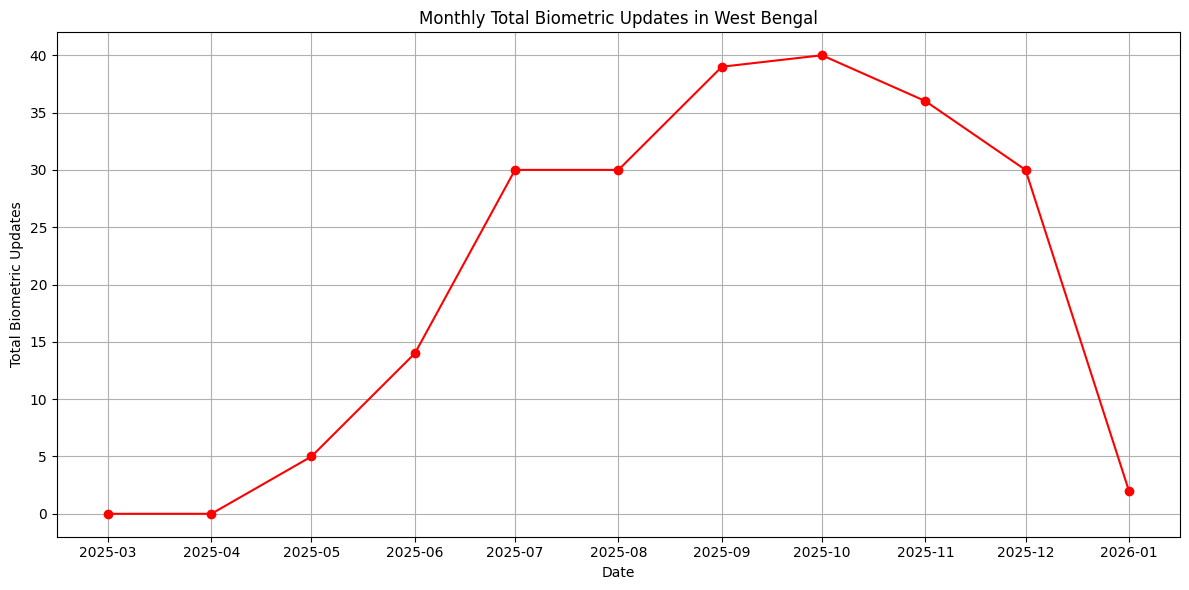

Monthly trend plots generated successfully.


In [688]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a monthly trends DataFrame
df_monthly_trends = df_wb_agg.groupby(['year', 'month']).agg({
    'totalenrolments': 'sum',
    'totaldemoupdates': 'sum',
    'totalbioupdates': 'sum'
}).reset_index()

# Create a date column for plotting
df_monthly_trends['date'] = pd.to_datetime(df_monthly_trends['year'].astype(str) + '-' + df_monthly_trends['month'].astype(str) + '-01')

# Sort by date to ensure proper trend plotting
df_monthly_trends = df_monthly_trends.sort_values(by='date')

# Plotting totalenrolments monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_monthly_trends['date'], df_monthly_trends['totalenrolments'], marker='o', linestyle='-', color='blue')
plt.xlabel('Date')
plt.ylabel('Total Enrolments')
plt.title('Monthly Total Enrolments in West Bengal')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting totaldemoupdates monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_monthly_trends['date'], df_monthly_trends['totaldemoupdates'], marker='o', linestyle='-', color='green')
plt.xlabel('Date')
plt.ylabel('Total Demographic Updates')
plt.title('Monthly Total Demographic Updates in West Bengal')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting totalbioupdates monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_monthly_trends['date'], df_monthly_trends['totalbioupdates'], marker='o', linestyle='-', color='red')
plt.xlabel('Date')
plt.ylabel('Total Biometric Updates')
plt.title('Monthly Total Biometric Updates in West Bengal')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Monthly trend plots generated successfully.")

**Univariate Analysis**

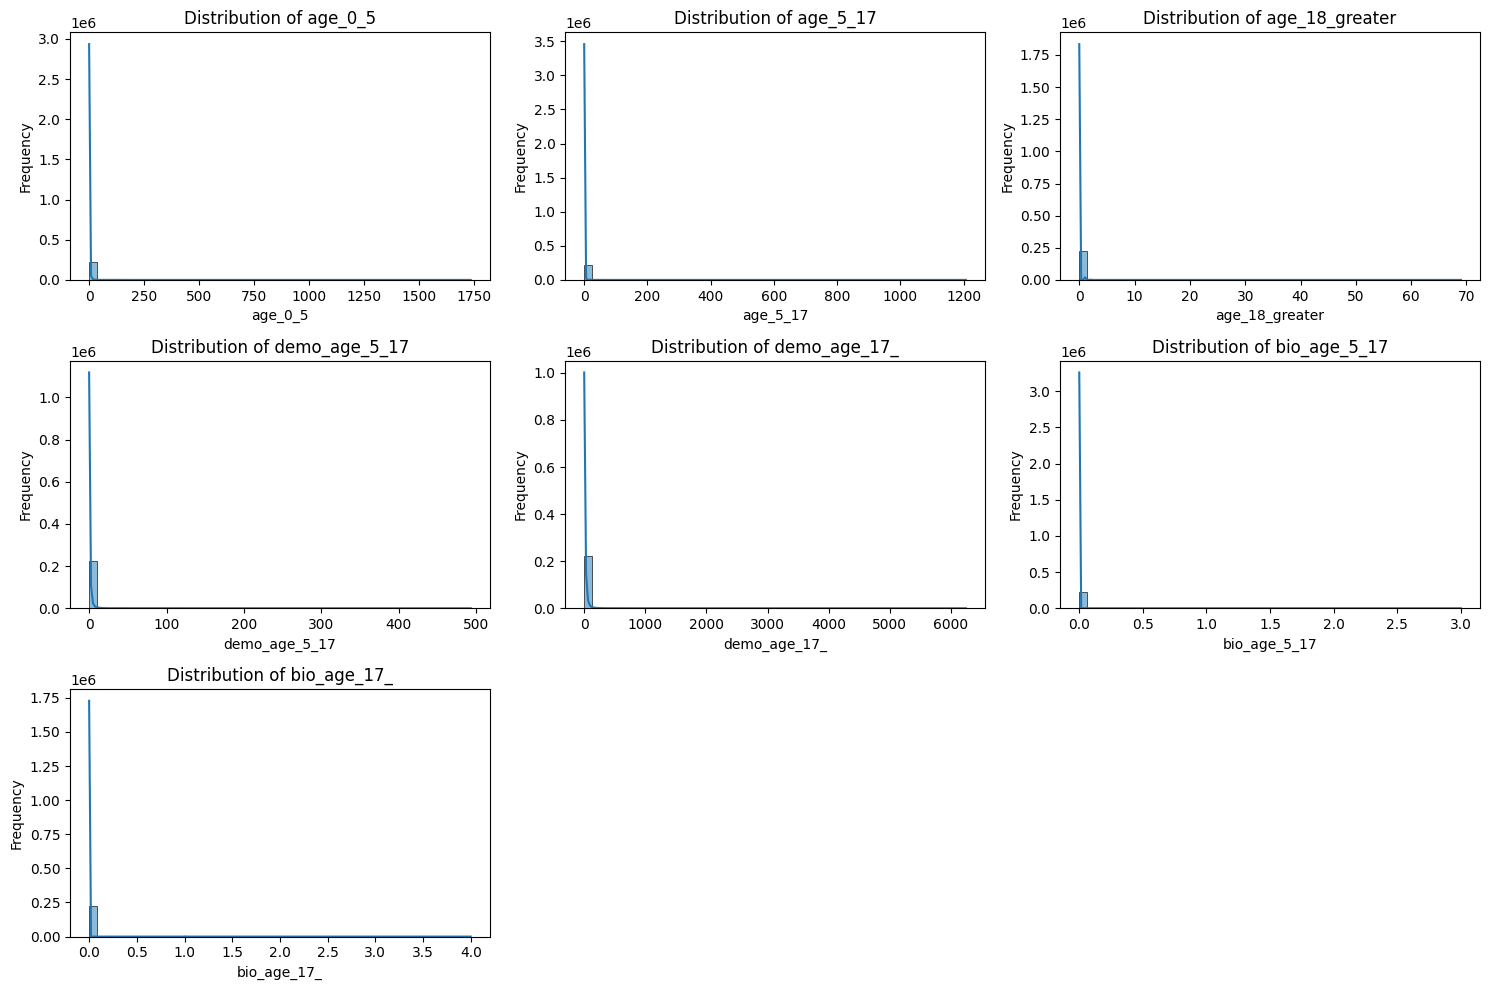

Histograms for numerical columns displayed.


In [689]:
import matplotlib.pyplot as plt
import seaborn as sns
numerical_cols = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df_merged[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

print("Histograms for numerical columns displayed.")

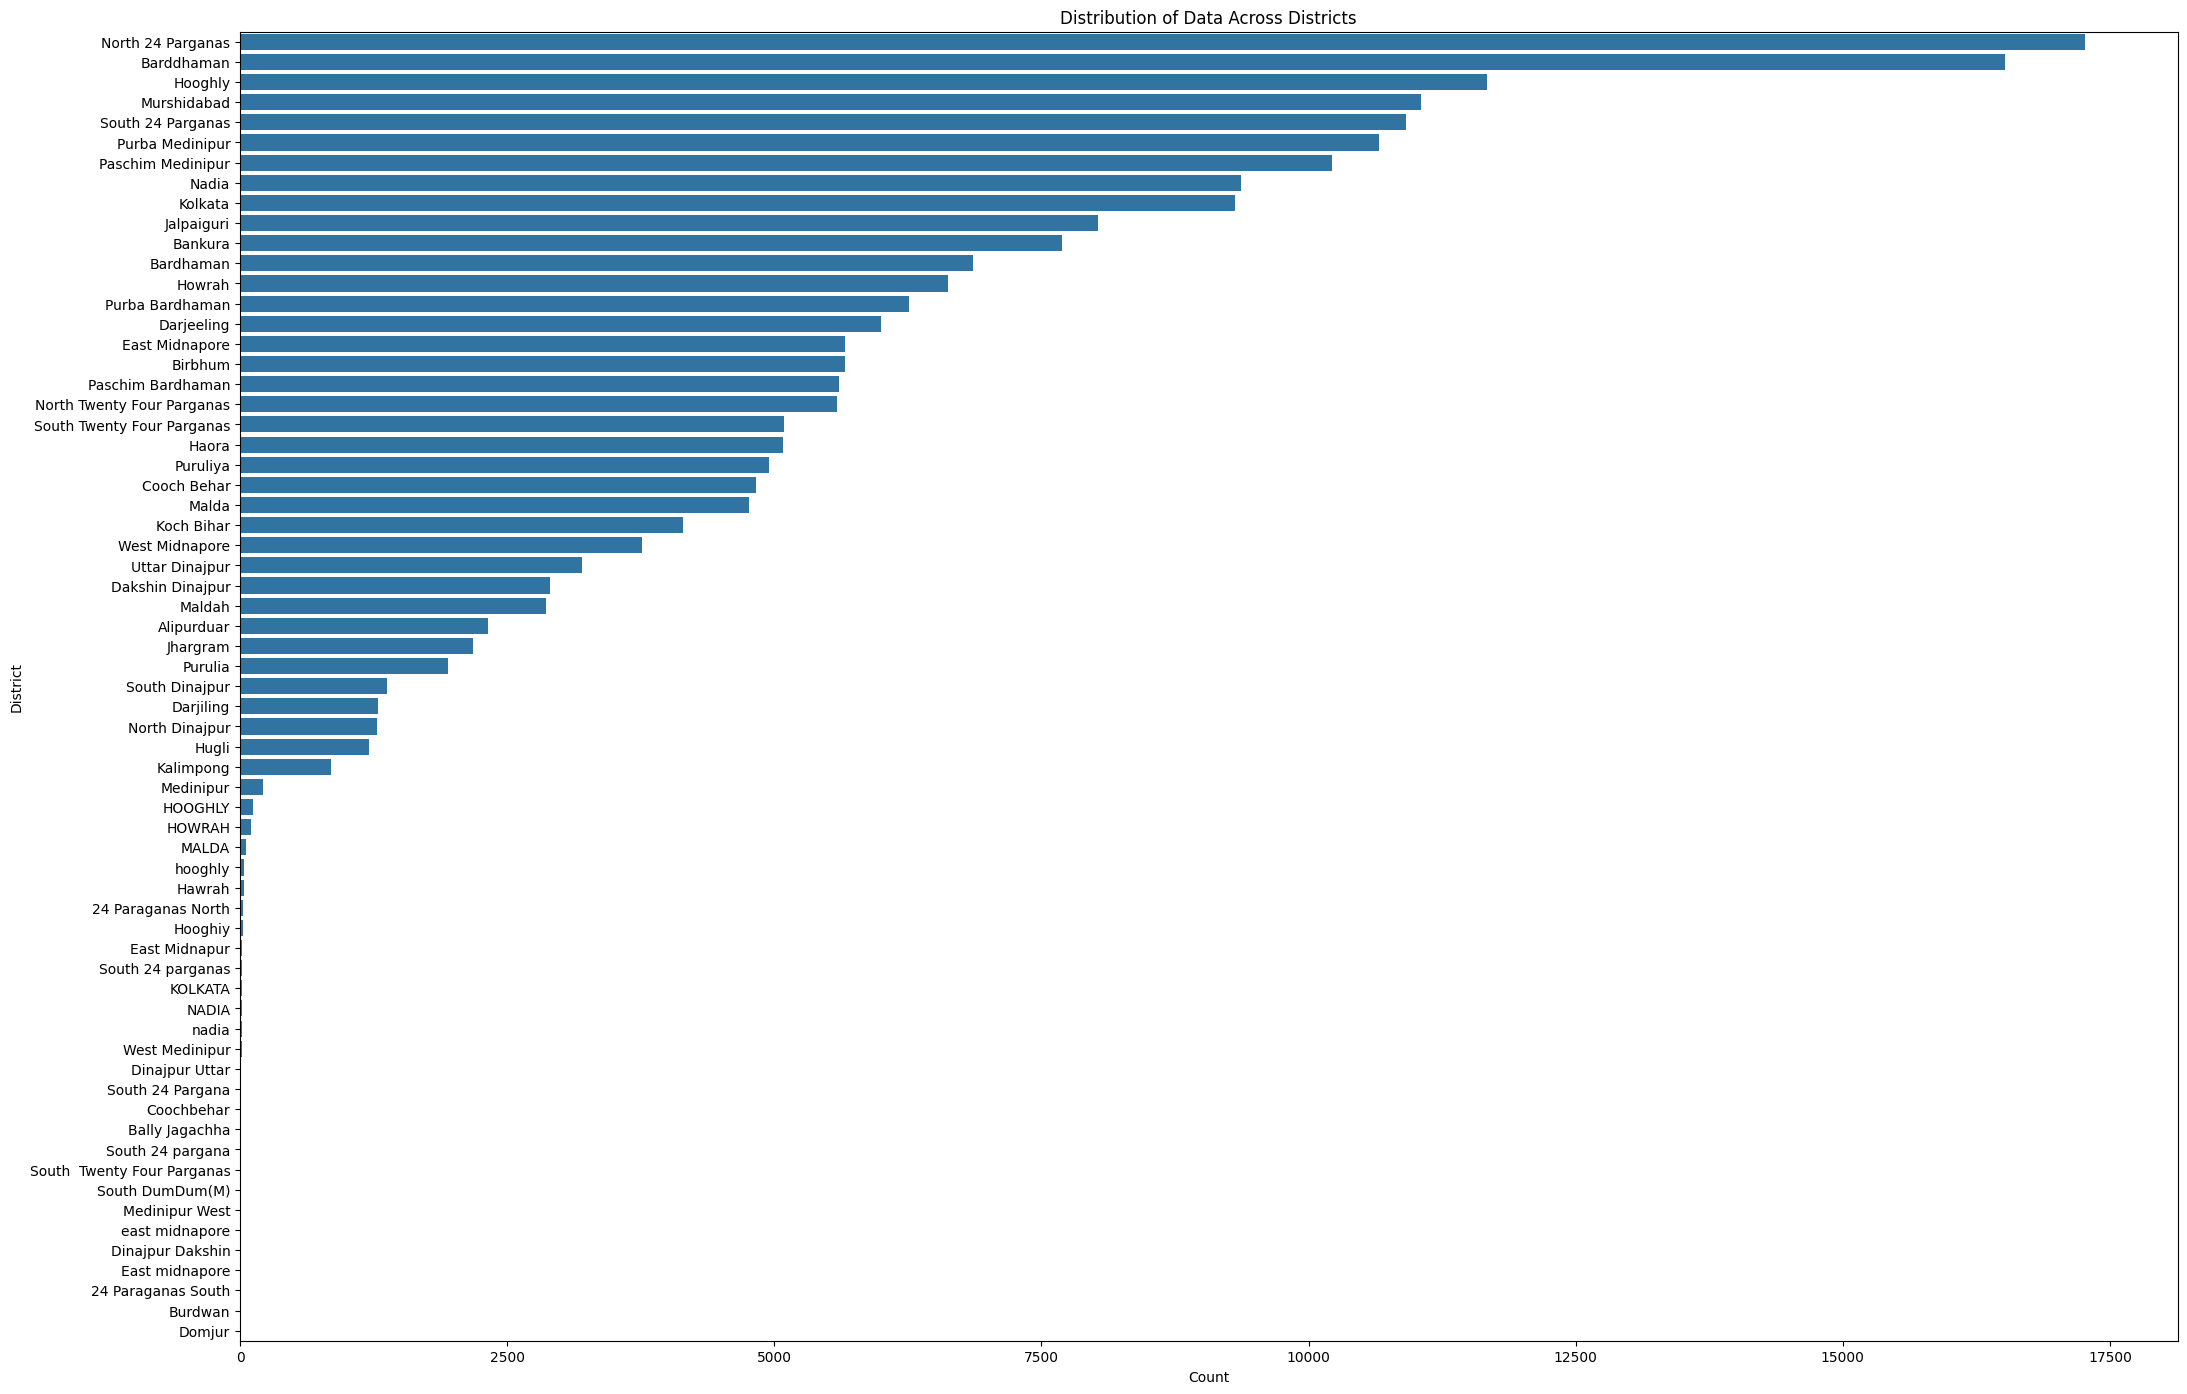

Count plot for 'district' displayed.


In [690]:
import seaborn as sns
plt.figure(figsize=(25, 17))
sns.countplot(data=df_merged, y='district', order=df_merged['district'].value_counts().index)
plt.title('Distribution of Data Across Districts')
plt.xlabel('Count')
plt.ylabel('District')
plt.show()

print("Count plot for 'district' displayed.")

**Bivariate and Trivarite Analysis**

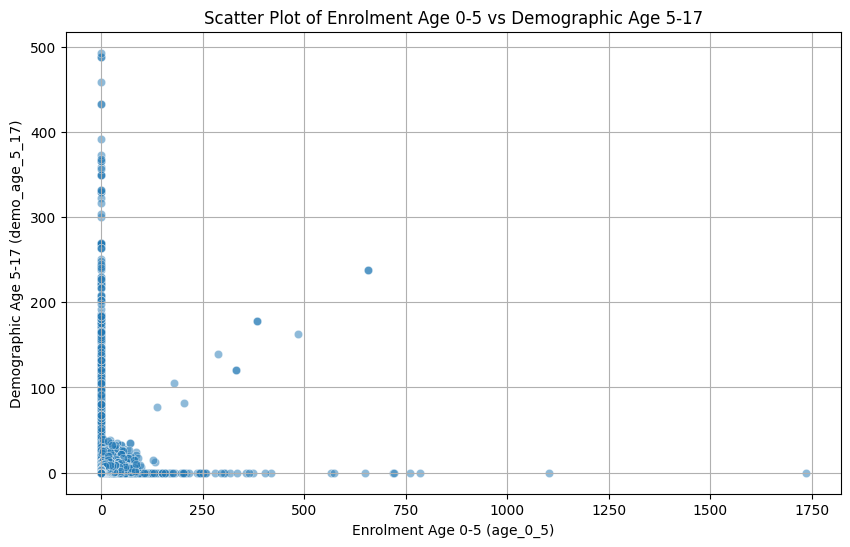

Insight: There appears to be a weak positive correlation between 'age_0_5' and 'demo_age_5_17', though many data points are clustered at the lower ends of both variables.


In [691]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged, x='age_0_5', y='demo_age_5_17', alpha=0.5)
plt.title('Scatter Plot of Enrolment Age 0-5 vs Demographic Age 5-17')
plt.xlabel('Enrolment Age 0-5 (age_0_5)')
plt.ylabel('Demographic Age 5-17 (demo_age_5_17)')
plt.grid(True)
plt.show()

print("Insight: There appears to be a weak positive correlation between 'age_0_5' and 'demo_age_5_17', though many data points are clustered at the lower ends of both variables.")

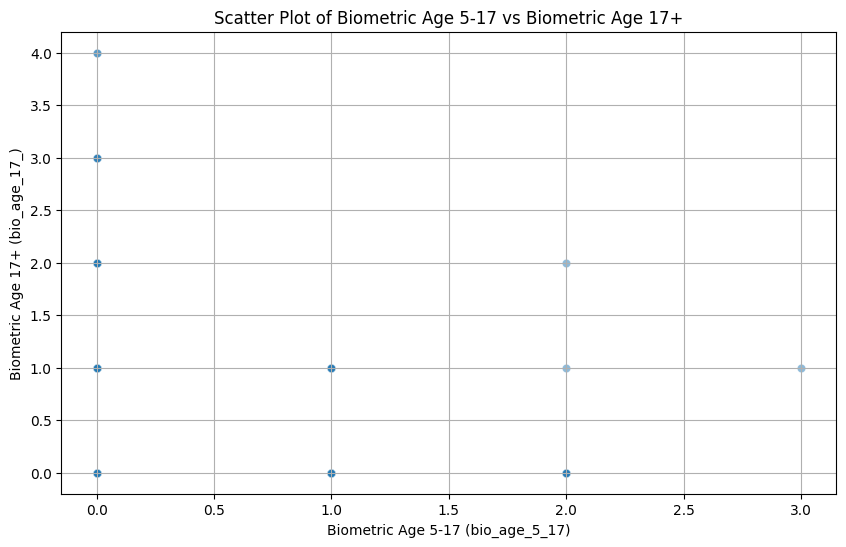

Insight: The scatter plot reveals a positive correlation between 'bio_age_5_17' and 'bio_age_17_', indicating that higher biometric counts in one age group often correspond to higher counts in the other.


In [692]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged, x='bio_age_5_17', y='bio_age_17_', alpha=0.5)
plt.title('Scatter Plot of Biometric Age 5-17 vs Biometric Age 17+')
plt.xlabel('Biometric Age 5-17 (bio_age_5_17)')
plt.ylabel('Biometric Age 17+ (bio_age_17_)')
plt.grid(True)
plt.show()

print("Insight: The scatter plot reveals a positive correlation between 'bio_age_5_17' and 'bio_age_17_', indicating that higher biometric counts in one age group often correspond to higher counts in the other.")

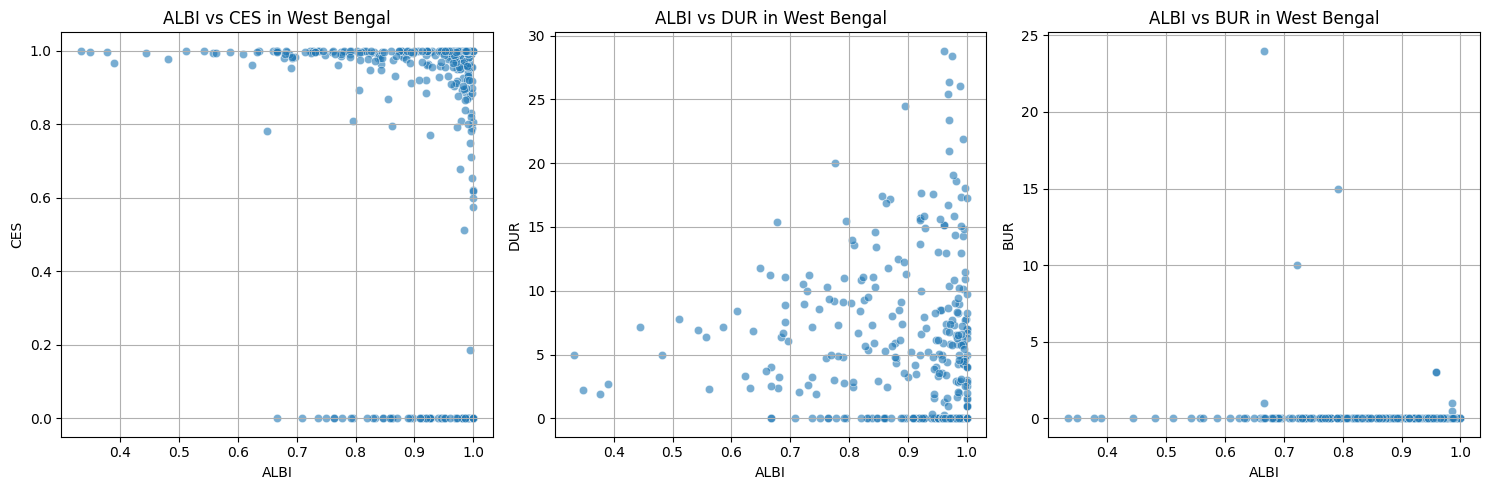

In [702]:
import matplotlib.pyplot as plt
import seaborn as sns

metrics_for_albi_scatter = ['CES', 'DUR', 'BUR']

plt.figure(figsize=(15, 5))
for i, metric in enumerate(metrics_for_albi_scatter):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(data=df_wb_agg, x='ALBI', y=metric, alpha=0.6)
    plt.title(f'ALBI vs {metric} in West Bengal')
    plt.xlabel('ALBI')
    plt.ylabel(metric)
    plt.grid(True)
plt.tight_layout()
plt.show()

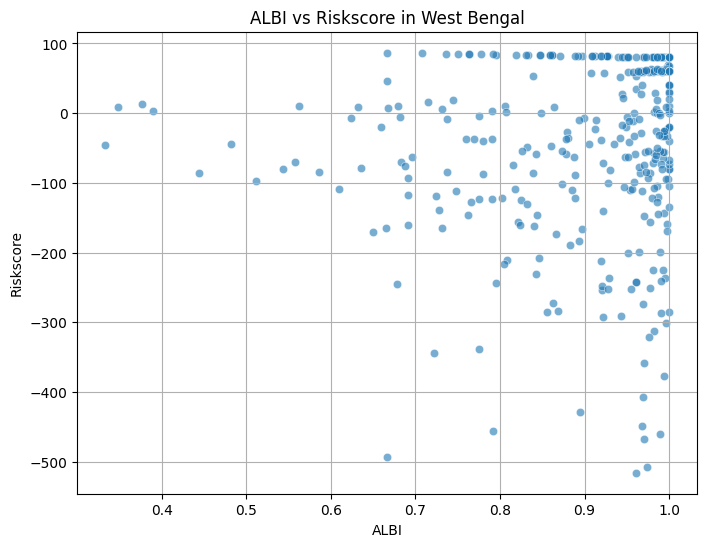

Bivariate analysis scatter plots for ALBI vs CES, DUR, BUR, and Riskscore displayed for West Bengal.


In [701]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_wb_agg, x='ALBI', y='riskscore', alpha=0.6)
plt.title('ALBI vs Riskscore in West Bengal')
plt.xlabel('ALBI')
plt.ylabel('Riskscore')
plt.grid(True)
plt.show()

print("Bivariate analysis scatter plots for ALBI vs CES, DUR, BUR, and Riskscore displayed for West Bengal.")

Correlation Matrix:
                 age_0_5  age_5_17  age_18_greater  demo_age_5_17  \
age_0_5         1.000000  0.849576        0.417763       0.092248   
age_5_17        0.849576  1.000000        0.438481       0.066075   
age_18_greater  0.417763  0.438481        1.000000       0.036795   
demo_age_5_17   0.092248  0.066075        0.036795       1.000000   
demo_age_17_    0.113410  0.079887        0.042063       0.926604   
bio_age_5_17   -0.002882 -0.001490       -0.000979      -0.002245   
bio_age_17_    -0.007216 -0.003730       -0.002450      -0.005621   

                demo_age_17_  bio_age_5_17  bio_age_17_  
age_0_5             0.113410     -0.002882    -0.007216  
age_5_17            0.079887     -0.001490    -0.003730  
age_18_greater      0.042063     -0.000979    -0.002450  
demo_age_5_17       0.926604     -0.002245    -0.005621  
demo_age_17_        1.000000     -0.003364    -0.008480  
bio_age_5_17       -0.003364      1.000000     0.064277  
bio_age_17_        -0

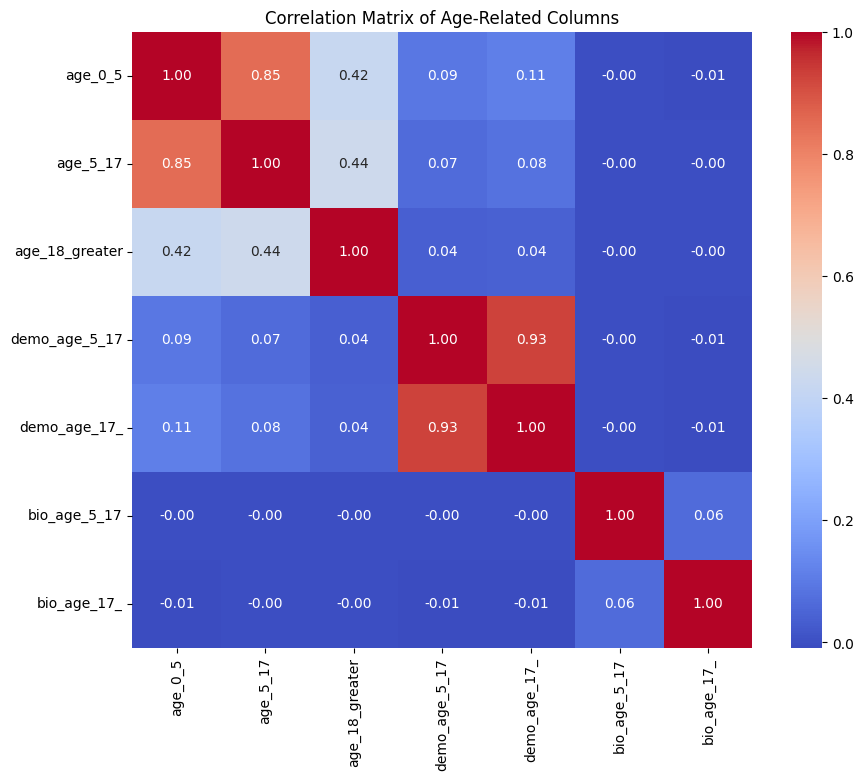

Insight: The heatmap visually confirms the correlation strengths and directions among the age-related variables, highlighting strong positive correlations within demographic and biometric groups, and weaker correlations between different data sources.


In [694]:
numerical_age_cols = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']
correlation_matrix = df_merged[numerical_age_cols].corr()

print("Correlation Matrix:")
print(correlation_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Age-Related Columns')
plt.show()

print("Insight: The heatmap visually confirms the correlation strengths and directions among the age-related variables, highlighting strong positive correlations within demographic and biometric groups, and weaker correlations between different data sources.")

In [695]:
age_cols_to_group = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']
df_district_mean = df_merged.groupby('district')[age_cols_to_group].mean().reset_index()

print("District-wise average age-related data:")
print(df_district_mean.head())
print(df_district_mean.info())

District-wise average age-related data:
             district     age_0_5    age_5_17  age_18_greater  demo_age_5_17  \
0  24 Paraganas North  102.483871   79.290323       16.516129       0.000000   
1  24 Paraganas South  364.000000  104.000000       22.000000       0.000000   
2          Alipurduar    0.727351    0.813632        0.230802       0.633736   
3      Bally Jagachha    0.000000    0.000000        0.000000       0.000000   
4             Bankura    1.533013    0.413049        0.032103       1.137120   

   demo_age_17_  bio_age_5_17  bio_age_17_  
0      0.000000           0.0          0.0  
1      0.000000           0.0          0.0  
2      5.166523           0.0          0.0  
3      1.000000           0.0          0.0  
4     19.378347           0.0          0.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   district    

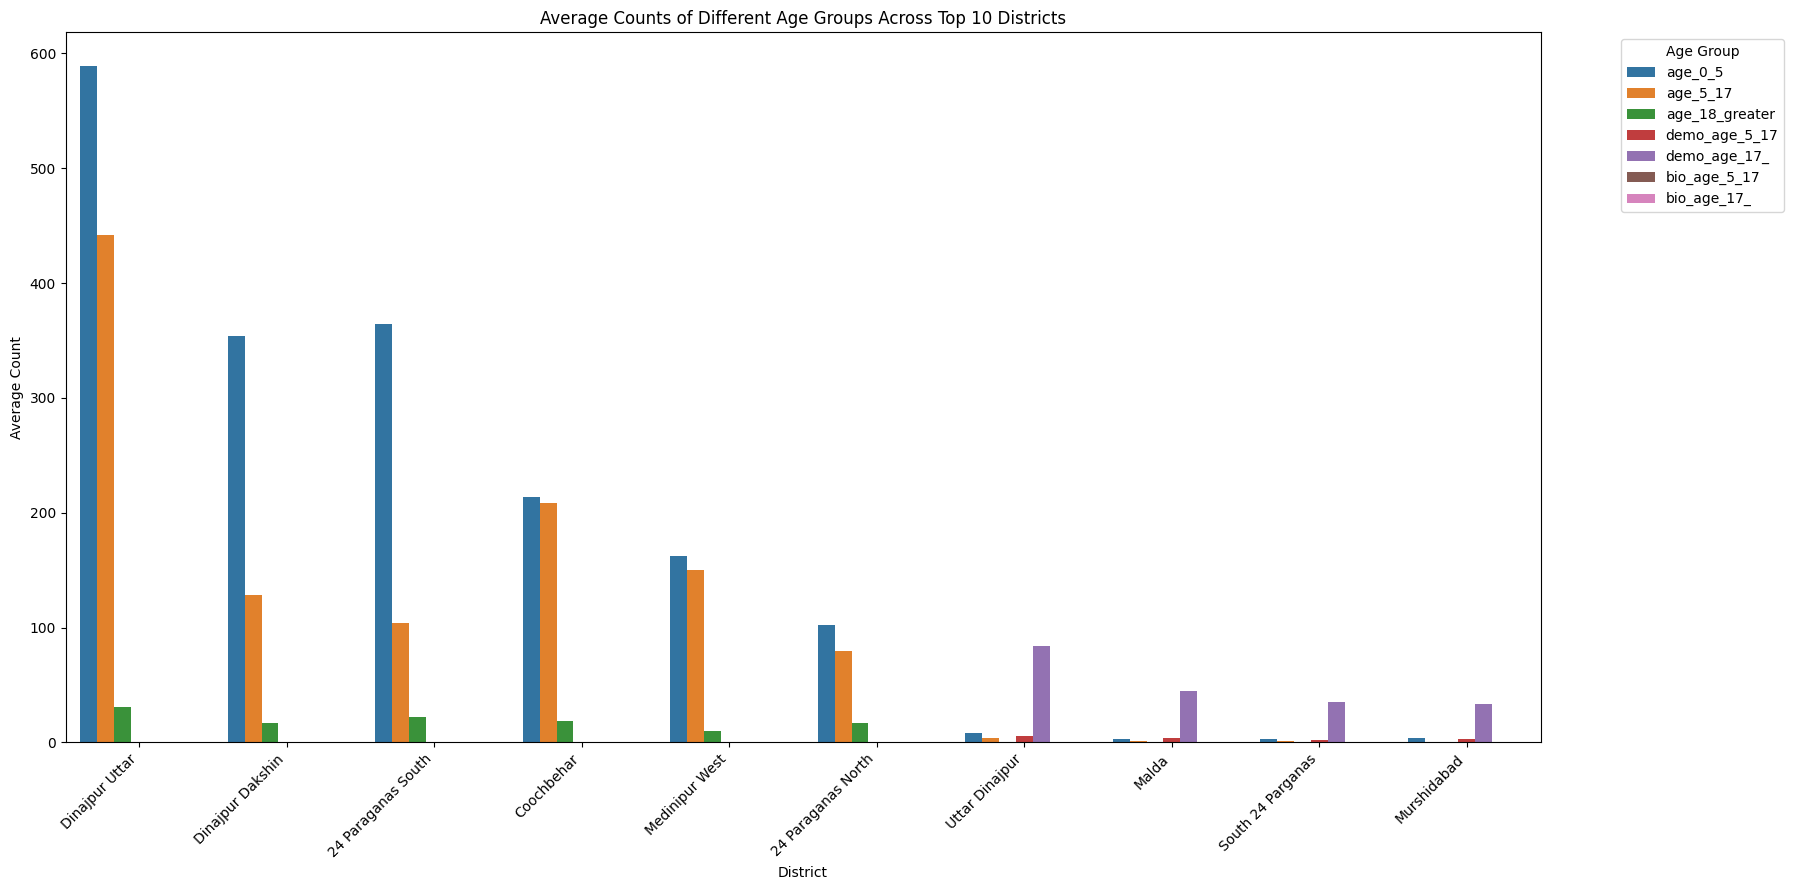

Insight: The grouped bar chart shows the distribution of average enrolment, demographic, and biometric counts across the top 10 districts, highlighting which districts have higher overall activity and the relative contribution of each age group.


In [696]:
df_district_mean['total_avg_age'] = df_district_mean[age_cols_to_group].sum(axis=1)
df_district_mean_top10 = df_district_mean.nlargest(10, 'total_avg_age')

df_district_mean_melted = df_district_mean_top10.melt(
    id_vars=['district'],
    value_vars=age_cols_to_group,
    var_name='Age Group',
    value_name='Average Count'
)

plt.figure(figsize=(18, 9))
sns.barplot(data=df_district_mean_melted, x='district', y='Average Count', hue='Age Group', palette='tab10')
plt.title('Average Counts of Different Age Groups Across Top 10 Districts')
plt.xlabel('District')
plt.ylabel('Average Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("Insight: The grouped bar chart shows the distribution of average enrolment, demographic, and biometric counts across the top 10 districts, highlighting which districts have higher overall activity and the relative contribution of each age group.")

Time-series aggregated data (sum of age-related columns per date):
        date  age_0_5  age_5_17  age_18_greater  demo_age_5_17  demo_age_17_  \
0 2025-03-01      0.0       0.0             0.0        36315.0      540208.0   
1 2025-03-09     45.0      30.0            46.0            0.0           0.0   
2 2025-04-01   3206.0    1120.0           440.0         4255.0       50187.0   
3 2025-05-01   6578.0    4424.0           594.0         7805.0       73682.0   
4 2025-05-20      0.0       0.0             0.0            0.0           0.0   

   bio_age_5_17  bio_age_17_  
0           0.0          0.0  
1           0.0          0.0  
2           0.0          0.0  
3           0.0          0.0  
4           0.0          1.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            208 non-null    datetime64[ns]
 1   a

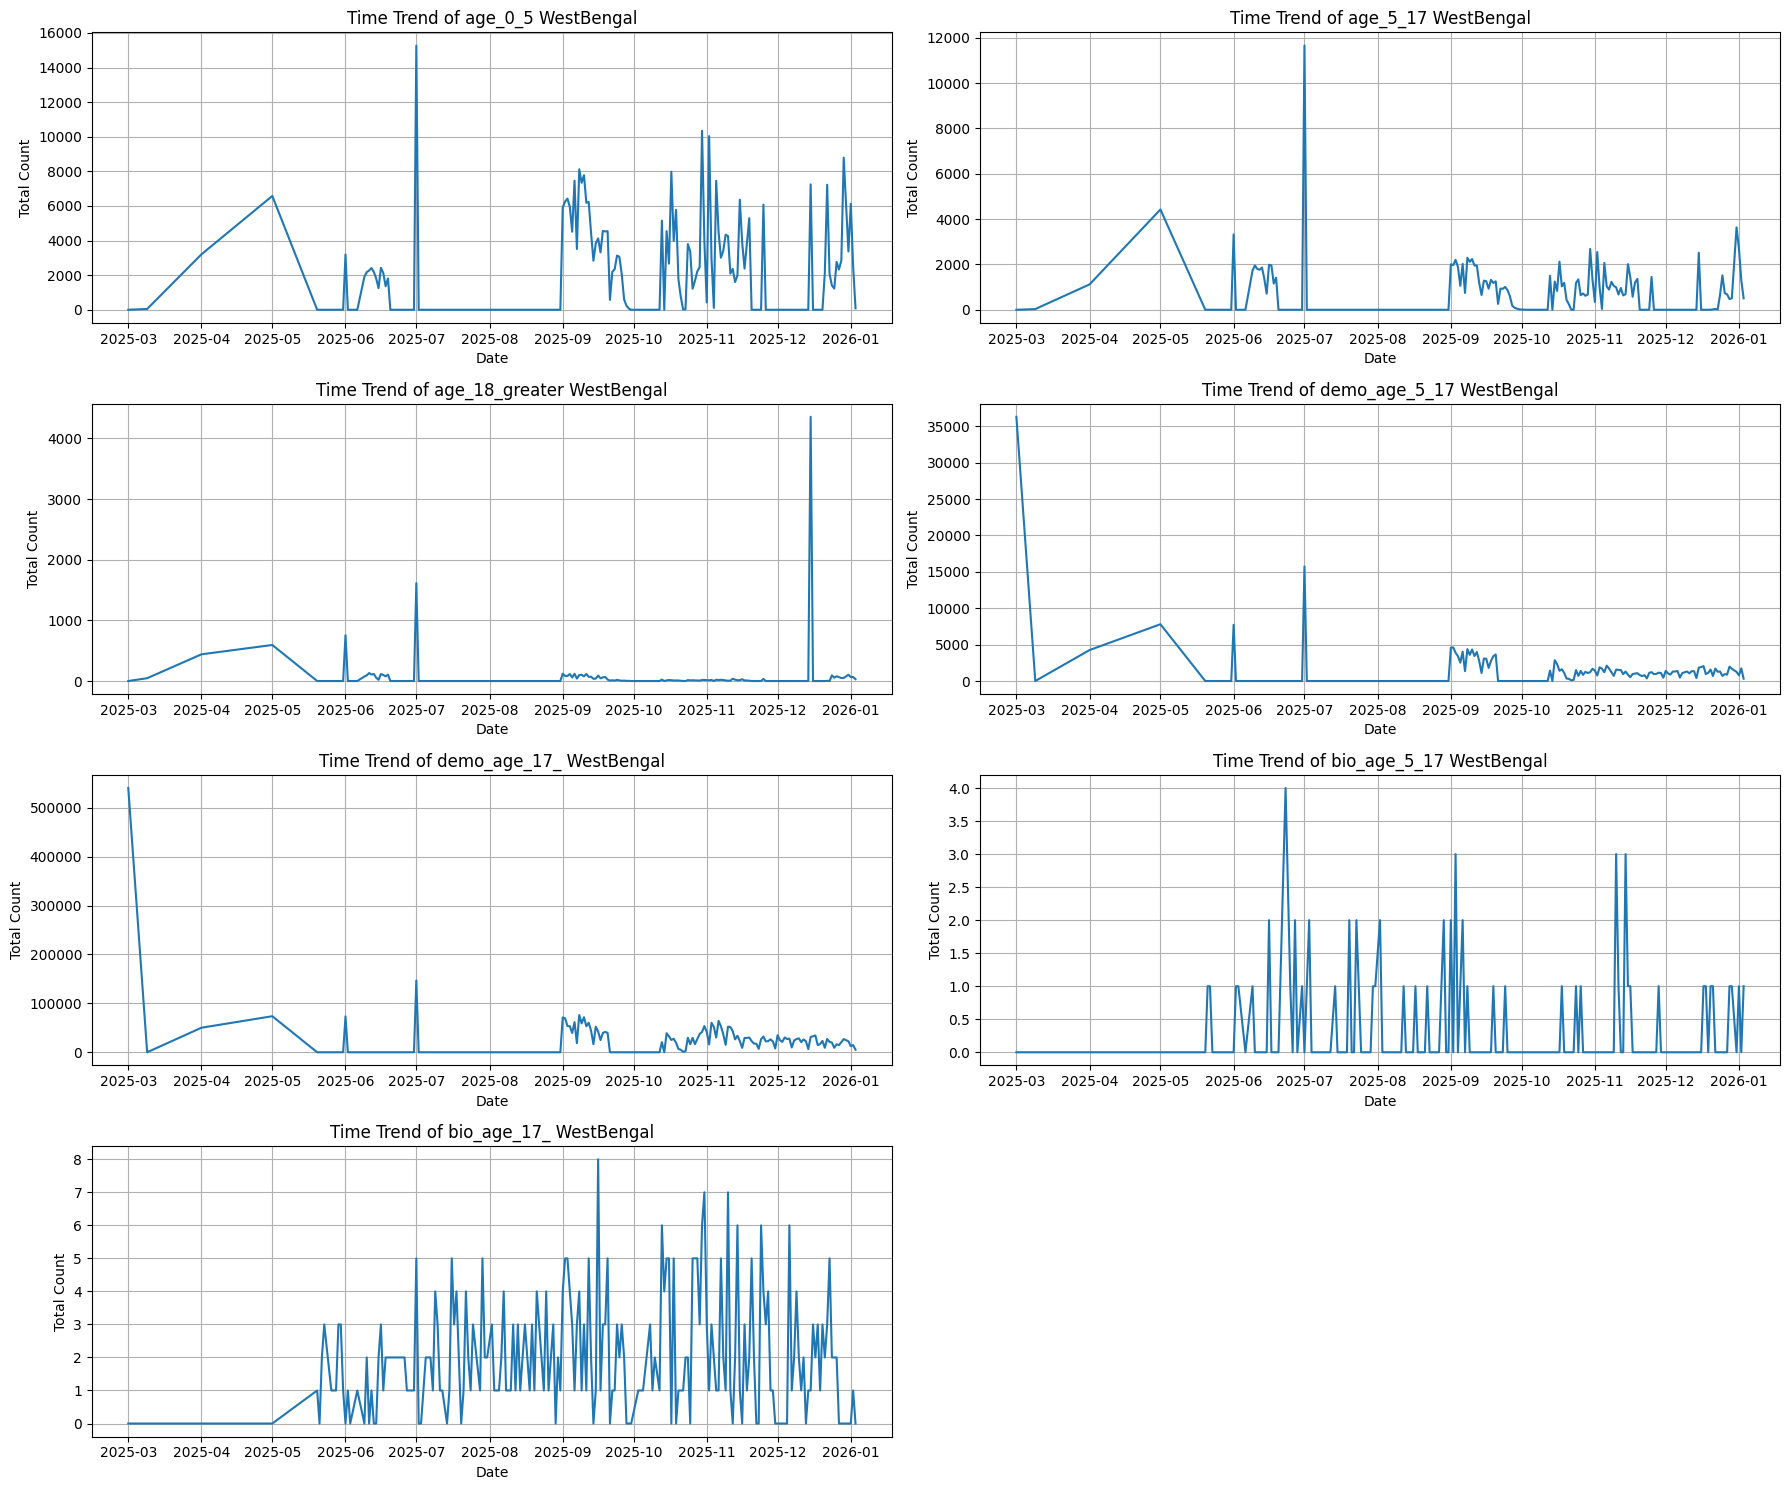

Insight: Line charts for each age-related column over time provide a clear visualization of their temporal trends, allowing for the identification of periods of high/low activity or significant changes.


In [703]:
df_time_trend = df_merged.groupby('date')[age_cols_to_group].sum().reset_index()

print("Time-series aggregated data (sum of age-related columns per date):")
print(df_time_trend.head())
print(df_time_trend.info())
plt.figure(figsize=(18, 15))
for i, col in enumerate(age_cols_to_group):
    plt.subplot(4, 2, i + 1) # Adjust subplot grid based on number of columns
    sns.lineplot(data=df_time_trend, x='date', y=col)
    plt.title(f'Time Trend of {col} WestBengal')
    plt.xlabel('Date')
    plt.ylabel('Total Count')
    plt.grid(True)
plt.tight_layout()
plt.show()

print("Insight: Line charts for each age-related column over time provide a clear visualization of their temporal trends, allowing for the identification of periods of high/low activity or significant changes.")

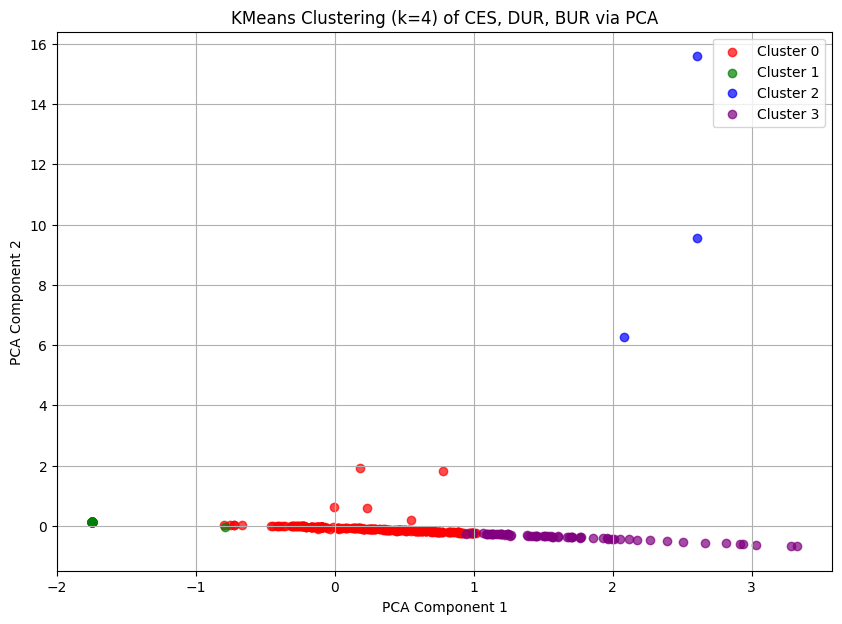

First 5 rows of df_ap_agg with 'clusterlabel' column:
   year  month        state     district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  West Bengal   Alipurduar      0.0       0.0             0.0   
1  2025      3  West Bengal      Bankura      0.0       0.0             0.0   
2  2025      3  West Bengal   Barddhaman      0.0       0.0             0.0   
3  2025      3  West Bengal      Birbhum      0.0       0.0             0.0   
4  2025      3  West Bengal  Cooch Behar      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  ...  Bnorm   stdnorm      ALBI  \
0          302.0        3156.0           0.0  ...    0.0  0.012643  0.987357   
1         1601.0       20474.0           0.0  ...    0.0  0.080712  0.919288   
2          985.0       18712.0           0.0  ...    0.0  0.072017  0.927983   
3         2035.0       26133.0           0.0  ...    0.0  0.102989  0.897011   
4         1440.0       18502.0           0.0  ...    0.0  0.072913  0.9

In [698]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# 1. Select the columns for clustering
features_for_clustering = df_wb_agg[['CES', 'DUR', 'BUR']]

# 2. Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# 3. Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10) # Added n_init=10 for newer sklearn versions
kmeans.fit(scaled_features)

# 4. Add the cluster labels to df_ap_agg
df_wb_agg['clusterlabel'] = kmeans.labels_

# 5. Apply PCA for dimensionality reduction
pca = PCA(n_components=2, random_state=42)
pca_components = pca.fit_transform(scaled_features)

# Create a DataFrame for PCA components for easier plotting
pca_df = pd.DataFrame(data=pca_components, columns=['PCA Component 1', 'PCA Component 2'])
pca_df['clusterlabel'] = df_wb_agg['clusterlabel']

# 6. Generate a PCA scatter plot to visualize these clusters
plt.figure(figsize=(10, 7))
colors = ['red', 'green', 'blue', 'purple']

for i in range(4):
    plt.scatter(
        pca_df[pca_df['clusterlabel'] == i]['PCA Component 1'],
        pca_df[pca_df['clusterlabel'] == i]['PCA Component 2'],
        c=colors[i],
        label=f'Cluster {i}',
        alpha=0.7
    )

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clustering (k=4) of CES, DUR, BUR via PCA')
plt.legend()
plt.grid(True)
plt.show()

print("First 5 rows of df_ap_agg with 'clusterlabel' column:")
print(df_wb_agg.head())

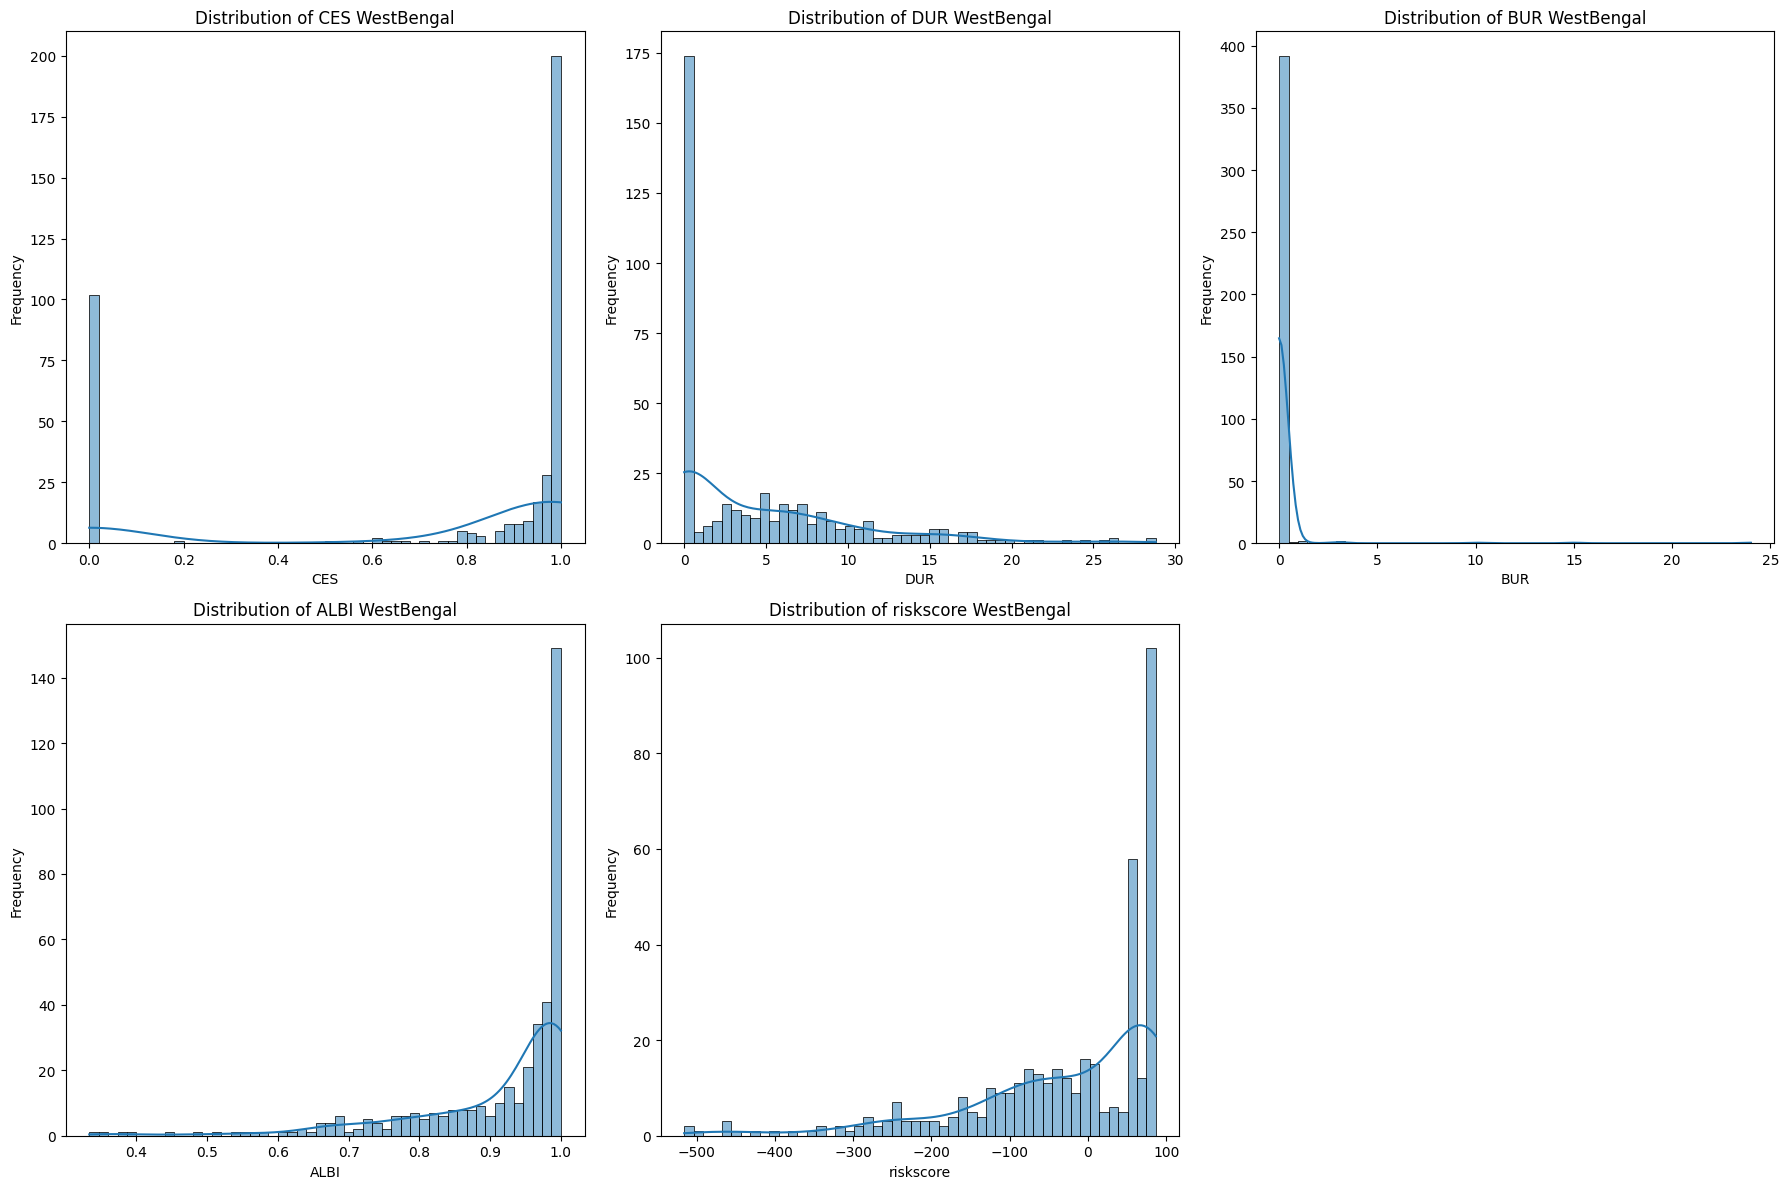

Histograms for CES, DUR, BUR, ALBI, and riskscore displayed.


In [704]:
metrics_to_plot = ['CES', 'DUR', 'BUR', 'ALBI', 'riskscore']

plt.figure(figsize=(18, 12))
for i, metric in enumerate(metrics_to_plot):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df_wb_agg[metric], bins=50, kde=True)
    plt.title(f'Distribution of {metric} WestBengal')
    plt.xlabel(metric)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print("Histograms for CES, DUR, BUR, ALBI, and riskscore displayed.")

In [700]:
import pandas as pd

# 1. Find the latest year and month
latest_year = df_wb_agg['year'].max()
latest_month = df_wb_agg[df_wb_agg['year'] == latest_year]['month'].max()

print(f"Latest reporting period: Year {latest_year}, Month {latest_month}")

# 2. Filter df_wb_agg for the latest year and month
df_latest_month = df_wb_agg[(df_wb_agg['year'] == latest_year) & (df_wb_agg['month'] == latest_month)].copy()

# Metrics to analyze
metrics = ['CES', 'DUR', 'BUR', 'ALBI', 'riskscore']

# 3. For each metric, print top 10 and bottom 10 districts
for metric in metrics:
    print(f"\n--- Metric: {metric} ---")

    # Top 10 districts
    top_10 = df_latest_month.sort_values(by=metric, ascending=False).head(10)
    print(f"\nTop 10 Districts by {metric} (Year {latest_year}, Month {latest_month}):")
    print(top_10[['district', metric]].to_string(index=False))

    # Bottom 10 districts
    bottom_10 = df_latest_month.sort_values(by=metric, ascending=True).head(10)
    print(f"\nBottom 10 Districts by {metric} (Year {latest_year}, Month {latest_month}):")
    print(bottom_10[['district', metric]].to_string(index=False))

Latest reporting period: Year 2026, Month 1

--- Metric: CES ---

Top 10 Districts by CES (Year 2026, Month 1):
                  district  CES
                 Bardhaman  1.0
                 Darjiling  1.0
North Twenty Four Parganas  1.0
                Koch Bihar  1.0
                 Medinipur  1.0
                     Haora  1.0
                     Hugli  1.0
                    HOWRAH  1.0
            East Midnapore  1.0
                   Purulia  1.0

Bottom 10 Districts by CES (Year 2026, Month 1):
         district      CES
    East Midnapur 0.000000
          HOOGHLY 0.000000
        Kalimpong 0.750000
       Alipurduar 0.896552
         Jhargram 0.904762
            Nadia 0.961078
          Kolkata 0.961905
North 24 Parganas 0.965375
 Dakshin Dinajpur 0.967033
Paschim Bardhaman 0.967213

--- Metric: DUR ---

Top 10 Districts by DUR (Year 2026, Month 1):
                  district      DUR
            East Midnapore 6.140351
                   Kolkata 4.926984
             

## SUMMARY:

###Child Enrolment Score (CES):

Top Performers (CES = 1.0): Districts like Bardhaman, Darjiling, North Twenty Four Parganas, Koch Bihar, Medinipur, Haora, Hugli, HOWRAH, East Midnapore, and Purulia show excellent child enrolment activity.
Bottom Performers (Lowest CES): East Midnapur and HOOGHLY had 0.0, followed by Kalimpong (0.75) and Alipurduar (0.895).

###Demographic Update Rate (DUR):

Top Performers (Highest DUR): East Midnapore (6.14), Kolkata (4.93), Haora (4.80), and North Twenty Four Parganas (4.66) lead in demographic updates relative to total enrolments.
Bottom Performers (Lowest DUR): East Midnapur, HOWRAH, HOOGHLY, and Medinipur all reported 0.0, indicating no demographic updates for the month.
Biometric Update Rate (BUR):

###Top Performer:
HOWRAH (1.0). All other listed top 10 districts for BUR had 0.0.
Bottom Performers: Most districts, including Alipurduar, Bankura, Bardhaman, Birbhum, Cooch Behar, Dakshin Dinajpur, Darjeeling, Darjiling, and East Midnapore, show a BUR of 0.0. This is a significant observation that might warrant further investigation into data reporting or actual activity levels.
Aadhaar Lifecycle Balance Index (ALBI):

###Top Performers (Highest ALBI):
East Midnapur (0.999), Medinipur (0.999), and Hugli (0.996) demonstrate a good balance between enrolments and updates.
Bottom Performers (Lowest ALBI): Murshidabad (0.347), South 24 Parganas (0.377), and North 24 Parganas (0.389) show the lowest balance.
Risk Score:

###Top Performers (Highest Risk Score):
HOOGHLY (86.67), East Midnapur (80.00), Medinipur (59.98), and HOWRAH (46.66) indicate areas with higher imbalance or potential issues.
Bottom Performers (Lowest Risk Score): Several districts, such as East Midnapore (-62.61), Kolkata (-37.48), and Haora (-35.99), show negative risk scores. This suggests an issue with the interpretation or calculation of the risk score for these districts, as a risk score should typically be positive or bounded between 0 and 100. This anomaly was also observed in the Andhra Pradesh analysis and needs further attention to ensure the metric is correctly reflecting risk.
Overall, the analysis highlights significant variations in Aadhaar lifecycle metrics across West Bengal districts, with some consistent patterns of districts performing well and others showing potential areas of concern, particularly with extremely low or negative scores in certain metrics.





